In [7]:
! pip install wordcloud nltk seaborn

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set basic seaborn style without using plt.style
sns.set_theme(style="whitegrid")
sns.set_palette("husl")
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [11]:
# Display initial number of rows
print("Initial number of rows:", len(df))

# Check missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())
print(df['Sleep Disorder'])

df.fillna('None', inplace=True)
print("\nMissing values in each column after cleaning:")
print(df.isnull().sum())


Initial number of rows: 374

Missing values in each column:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64
0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

Missing values in each column after cleaning:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category 

DataFrame Shape: (374, 12)

Numerical columns: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Categorical columns: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


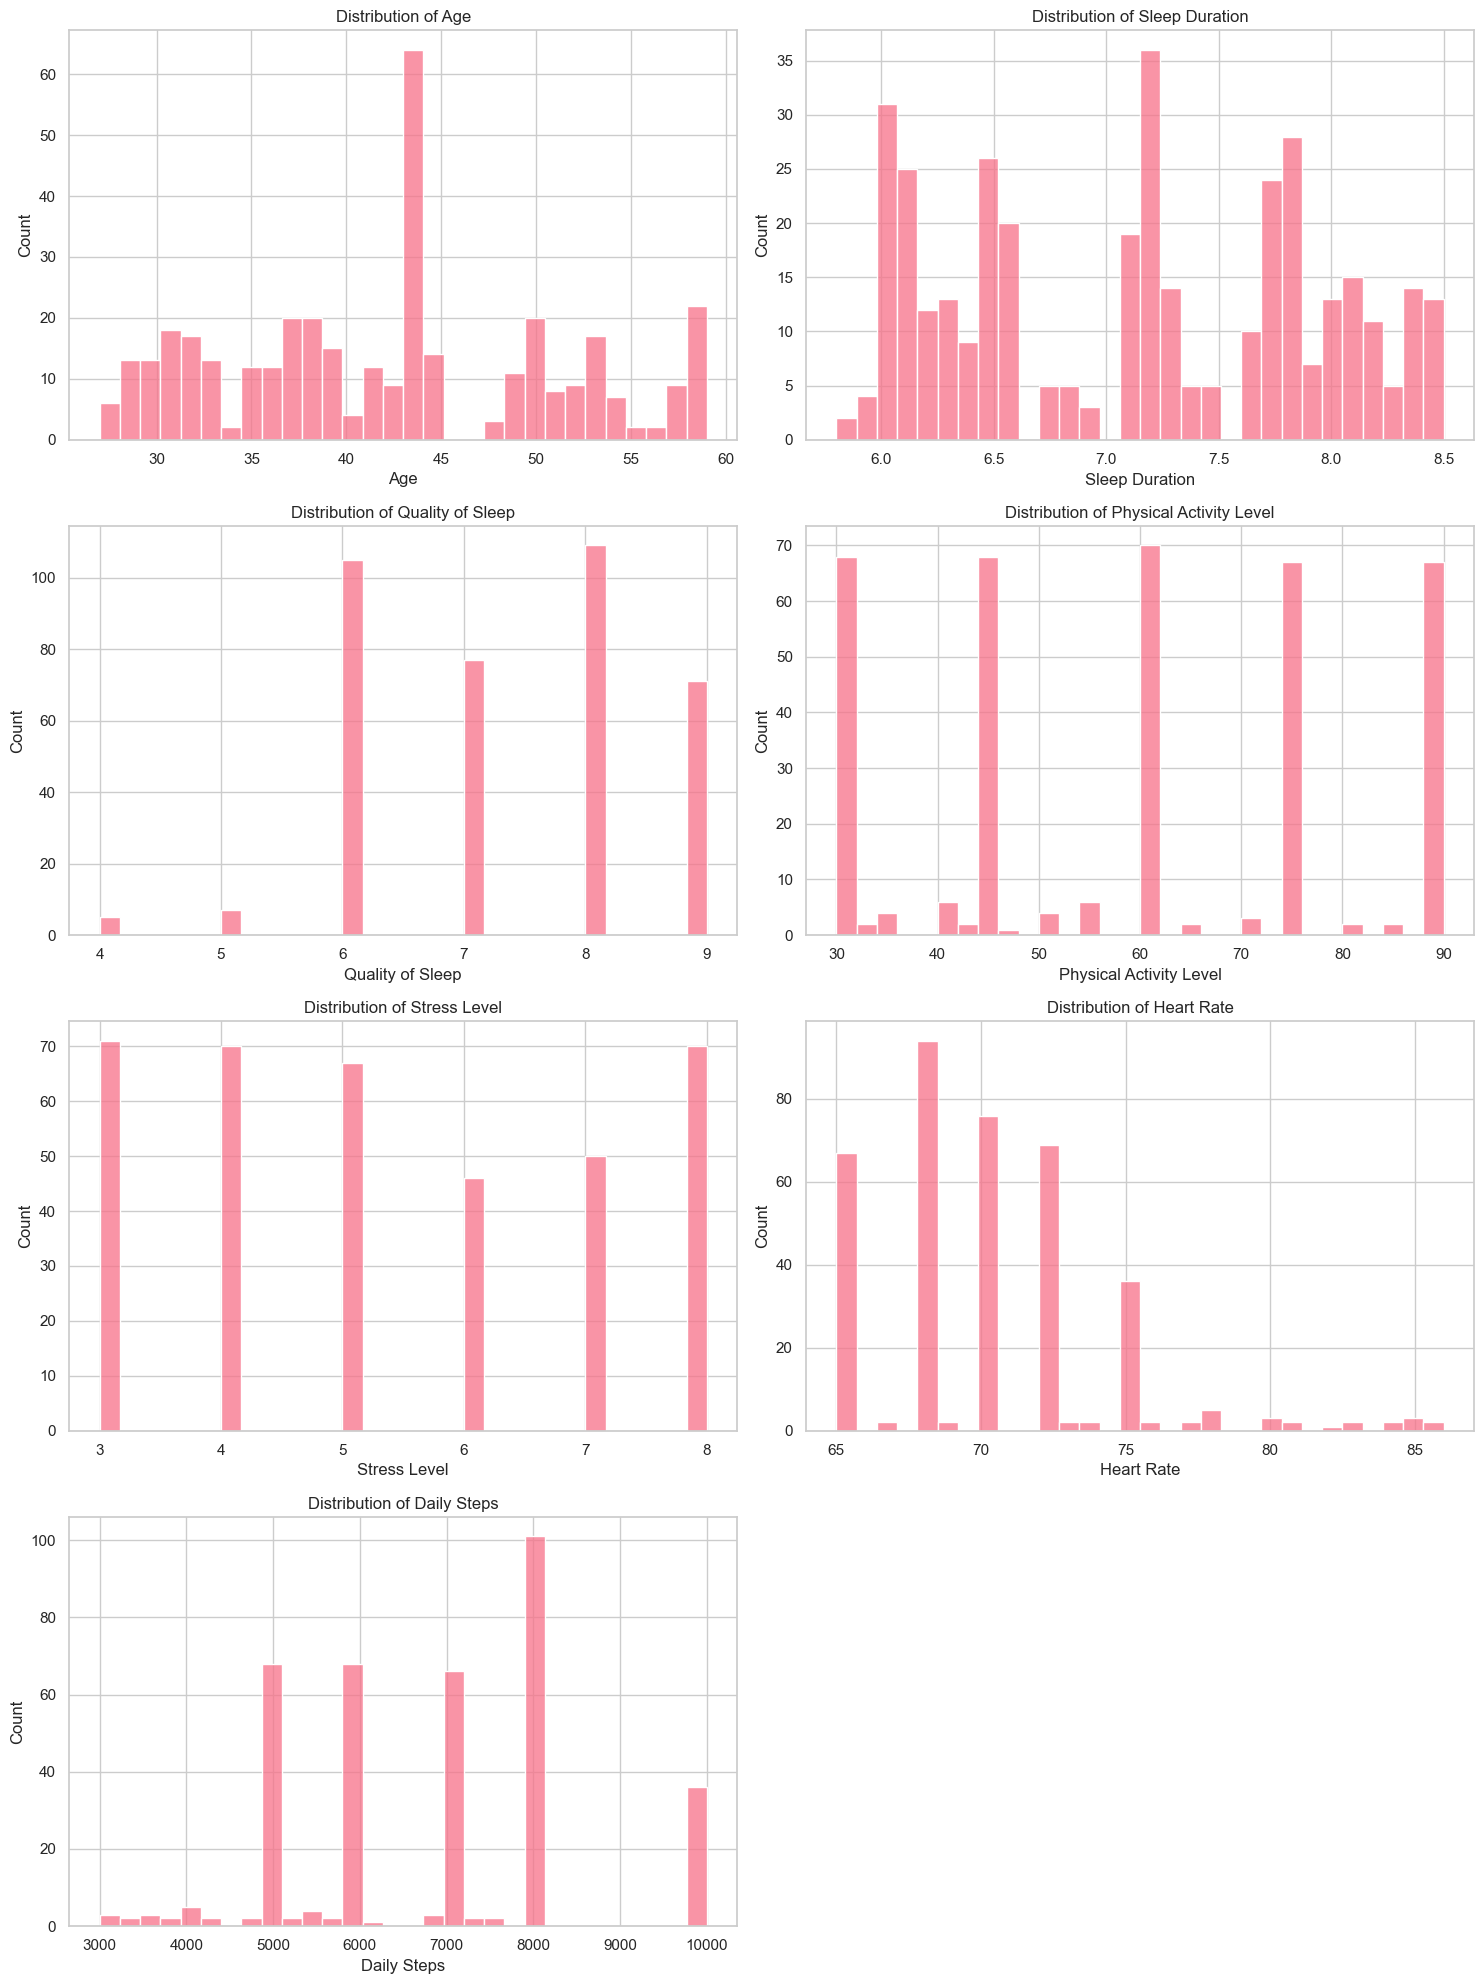

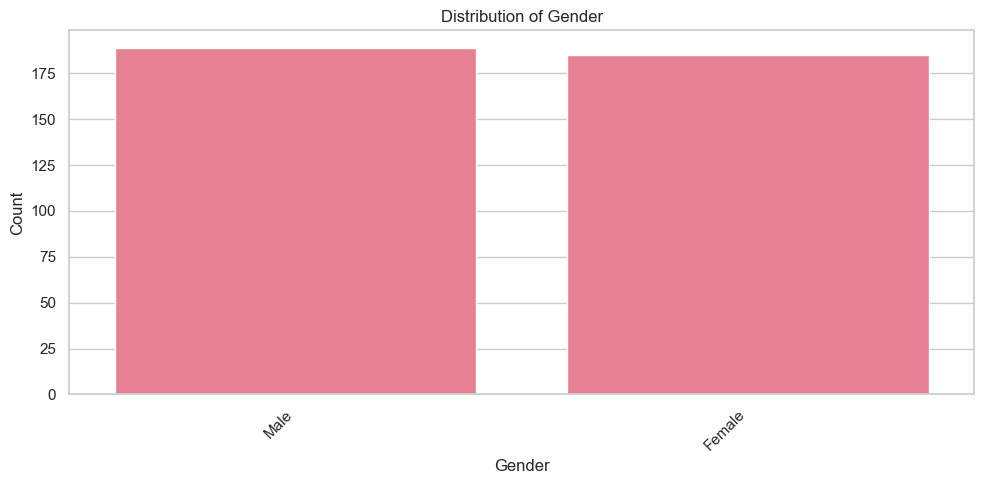

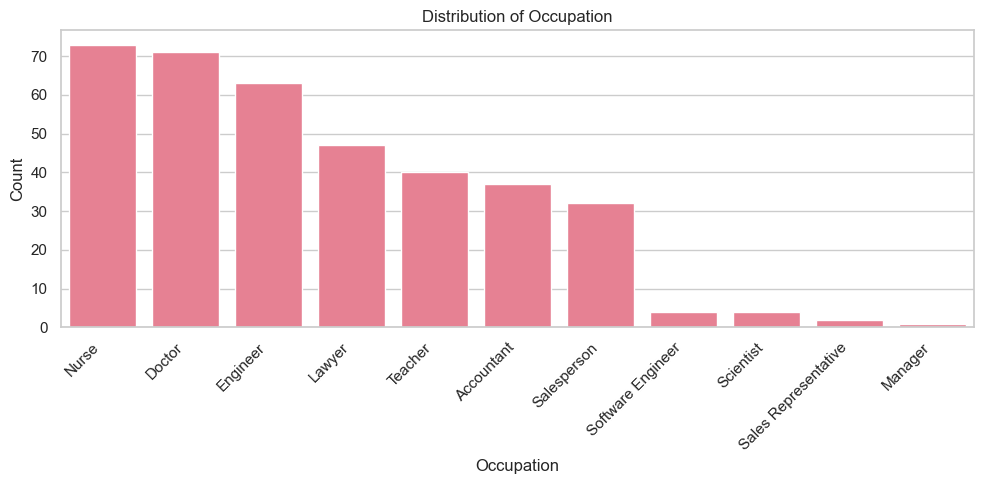

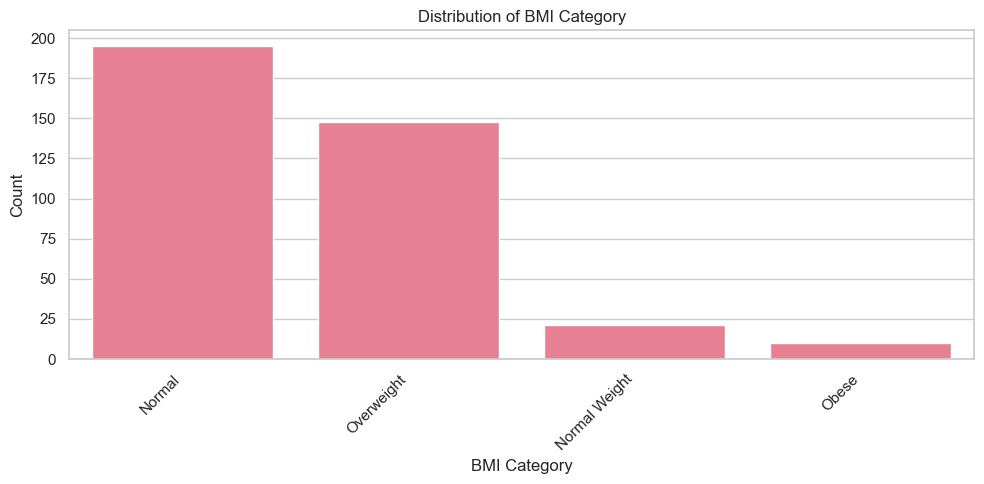


Showing top 20 categories for Blood Pressure (out of 25 categories)


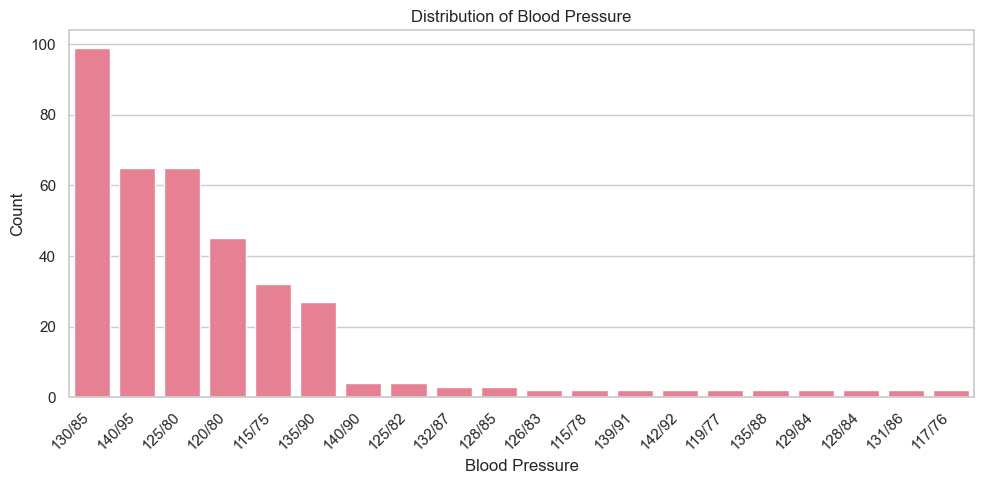

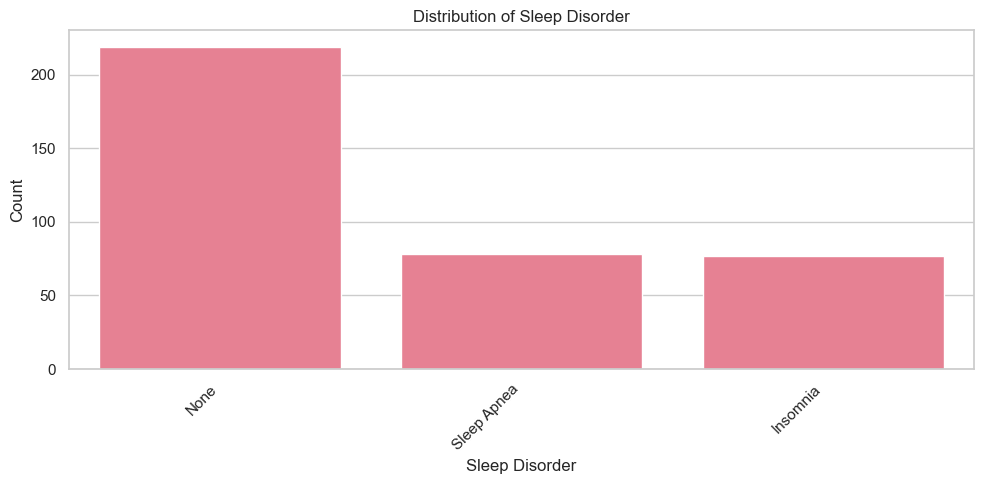


Numerical Columns Statistics:
              Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min        3.000000   65.000000   3000.000000  
25%     

In [14]:
# Drop 'Person ID' column
df_analysis = df.drop('Person ID', axis=1)

# Get numerical columns excluding 'Person ID'
numerical_cols = df_analysis.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_analysis.select_dtypes(include=['object', 'category']).columns

print("DataFrame Shape:", df_analysis.shape)
print("\nNumerical columns:", list(numerical_cols))
print("Categorical columns:", list(categorical_cols))

# Plotting distributions for numerical columns
if len(numerical_cols) > 0:
    num_plots = len(numerical_cols)
    fig_height = 5 * ((num_plots + 1) // 2)  # Adjust height based on number of plots
    
    plt.figure(figsize=(15, fig_height))
    for idx, col in enumerate(numerical_cols, 1):
        plt.subplot((num_plots + 1) // 2, 2, idx)
        sns.histplot(data=df_analysis, x=col, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Plotting distributions for categorical columns
if len(categorical_cols) > 0:
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        value_counts = df_analysis[col].value_counts()
        
        # If there are too many categories, show only top 20
        if len(value_counts) > 20:
            print(f"\nShowing top 20 categories for {col} (out of {len(value_counts)} categories)")
            value_counts = value_counts.head(20)
        
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

# Print basic statistics for numerical columns
if len(numerical_cols) > 0:
    print("\nNumerical Columns Statistics:")
    print(df_analysis[numerical_cols].describe())

# Print value counts for categorical columns
if len(categorical_cols) > 0:
    print("\nCategorical Columns Value Counts:")
    for col in categorical_cols:
        print(f"\n{col} - Top 10 categories:")
        print(df_analysis[col].value_counts().head(10))


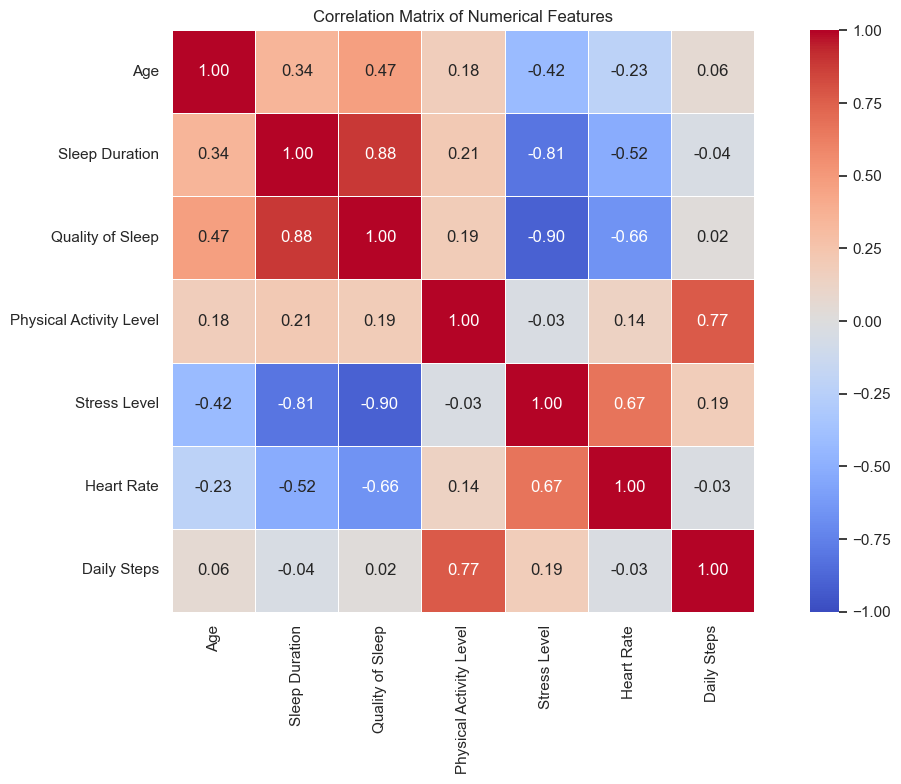


Strong Correlations (|correlation| > 0.5):
Sleep Duration vs Stress Level: -0.811
Quality of Sleep vs Sleep Duration: 0.883
Quality of Sleep vs Stress Level: -0.899
Heart Rate vs Sleep Duration: -0.516
Heart Rate vs Quality of Sleep: -0.660
Heart Rate vs Stress Level: 0.670
Daily Steps vs Physical Activity Level: 0.773


In [20]:
# Create correlation matrix
correlation_matrix = df_analysis.select_dtypes(include=['int64', 'float64']).corr()

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Round to 2 decimal places
            square=True,  # Make the plot square-shaped
            linewidths=0.5,  # Add lines between cells
            vmin=-1, vmax=1)  # Set correlation range

plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print the strongest correlations (absolute value > 0.5)
print("\nStrong Correlations (|correlation| > 0.5):")
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 < col2:  # To avoid printing both (a,b) and (b,a)
            corr = correlation_matrix.loc[col1, col2]
            if abs(corr) > 0.5:
                print(f"{col1} vs {col2}: {corr:.3f}")


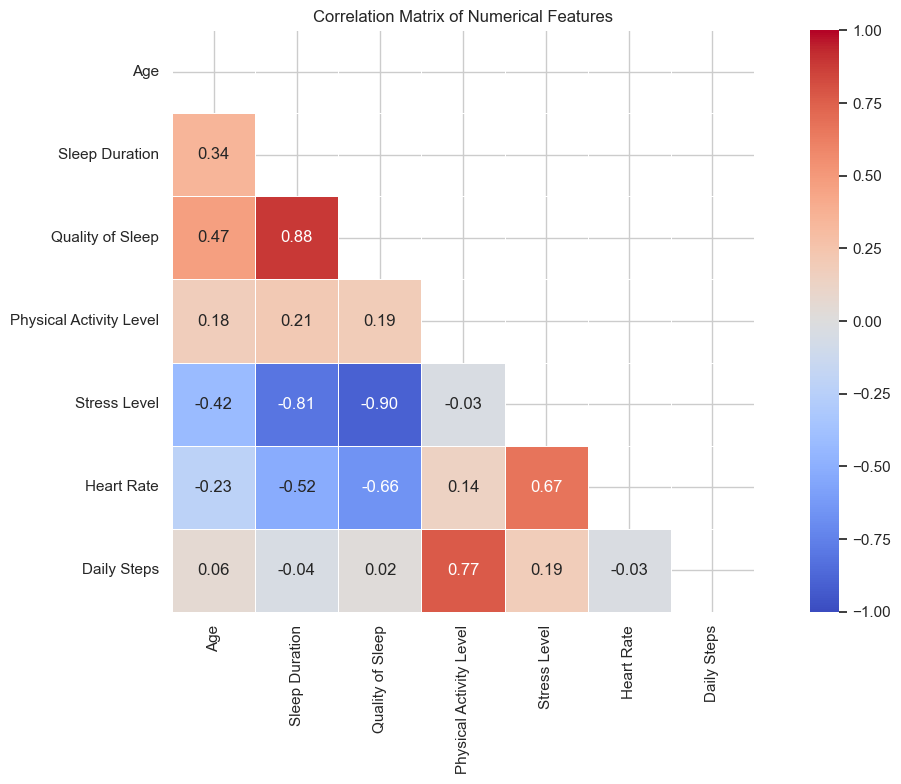


Strong Correlations (|correlation| > 0.5):
Sleep Duration vs Stress Level: -0.811
Quality of Sleep vs Sleep Duration: 0.883
Quality of Sleep vs Stress Level: -0.899
Heart Rate vs Sleep Duration: -0.516
Heart Rate vs Quality of Sleep: -0.660
Heart Rate vs Stress Level: 0.670
Daily Steps vs Physical Activity Level: 0.773


In [21]:
# Create correlation matrix
correlation_matrix = df_analysis.select_dtypes(include=['int64', 'float64']).corr()

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Round to 2 decimal places
            square=True,  # Make the plot square-shaped
            linewidths=0.5,  # Add lines between cells
            mask=mask,  # Apply mask to show only lower triangle
            vmin=-1, vmax=1)  # Set correlation range

plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print the strongest correlations (absolute value > 0.5)
print("\nStrong Correlations (|correlation| > 0.5):")
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 < col2:  # To avoid printing both (a,b) and (b,a)
            corr = correlation_matrix.loc[col1, col2]
            if abs(corr) > 0.5:
                print(f"{col1} vs {col2}: {corr:.3f}")
